<a href="https://colab.research.google.com/github/tajski/Projekt-Sieci-Neuronowe/blob/main/Projekt_Sieci_Neuronowe_BT_KW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Accuracy, binary_accuracy
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout

In [3]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/diabetic.zip"

Mounted at /content/drive


In [4]:
train_data_root = "train"
test_data_root = "test"
valid_data_root = "valid"

train_data = {}
test_data = {}
valid_data = {}

# Przechodzenie przez katalogi treningowe
for root, dirs, files in os.walk(train_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        train_data[dir] = os.listdir(dir_path)

print("Dane treningowe:")
for x in train_data:
    print(x, len(train_data[x]))

# Przechodzenie przez katalogi testowe
for root, dirs, files in os.walk(test_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        test_data[dir] = os.listdir(dir_path)

print()

print("Dane testowe:")
for x in test_data:
    print(x, len(test_data[x]))

    # Przechodzenie przez katalogi walidacyjne
for root, dirs, files in os.walk(valid_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        valid_data[dir] = os.listdir(dir_path)

print()

print("Dane treningowe:")
for x in valid_data:
    print(x, len(valid_data[x]))

Dane treningowe:
No_DR 1026
DR 1050

Dane testowe:
No_DR 118
DR 113

Dane treningowe:
No_DR 286
DR 245


In [5]:
train_dataset, valid_dataset = image_dataset_from_directory(train_data_root, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(test_data_root, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

Found 2076 files belonging to 2 classes.
Using 1661 files for training.
Using 415 files for validation.
Found 231 files belonging to 2 classes.


['DR', 'No_DR']


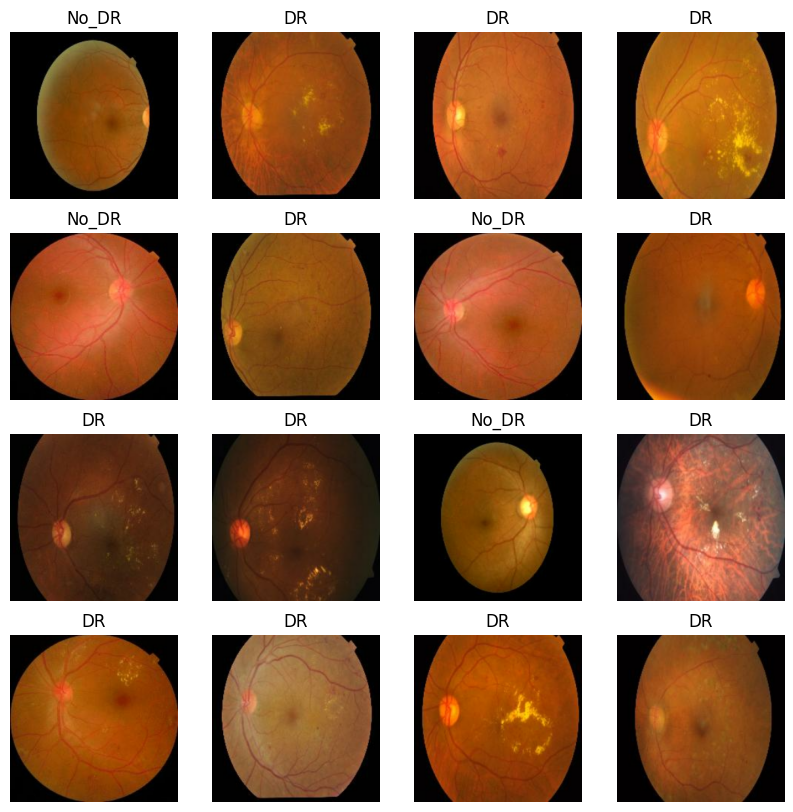

In [6]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")

# **Sieci Konwulcyjne**

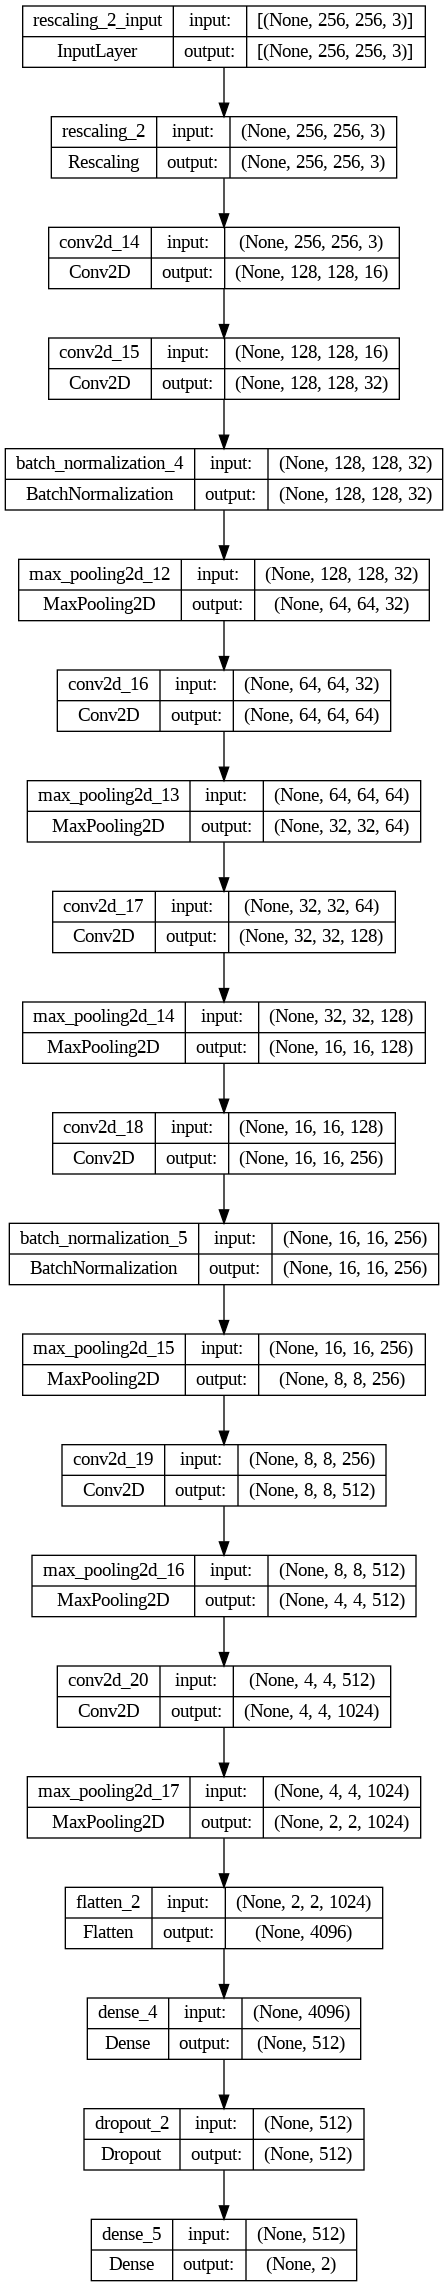

In [ ]:
modelCNN = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(2, activation="softmax")
])
plot_model(modelCNN, show_shapes=True)

In [ ]:
# Kompilacja
modelCNN.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN = modelCNN.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
52/52 [==============================] - 6s 59ms/step - loss: 1.0078 - accuracy: 0.7562 - val_loss: 0.7054 - val_accuracy: 0.4916
Epoch 2/40
52/52 [==============================] - 5s 84ms/step - loss: 0.2579 - accuracy: 0.8989 - val_loss: 0.8060 - val_accuracy: 0.4916
Epoch 3/40
52/52 [==============================] - 3s 57ms/step - loss: 0.2090 - accuracy: 0.9163 - val_loss: 0.9010 - val_accuracy: 0.4916
Epoch 4/40
52/52 [==============================] - 3s 58ms/step - loss: 0.1970 - accuracy: 0.9253 - val_loss: 0.7917 - val_accuracy: 0.4916
Epoch 5/40
52/52 [==============================] - 3s 53ms/step - loss: 0.1885 - accuracy: 0.9278 - val_loss: 1.3250 - val_accuracy: 0.4916
Epoch 6/40
52/52 [==============================] - 4s 79ms/step - loss: 0.1719 - accuracy: 0.9440 - val_loss: 1.8102 - val_accuracy: 0.4916
Epoch 7/40
52/52 [==============================] - 3s 57ms/step - loss: 0.1616 - accuracy: 0.9446 - val_loss: 1.3130 - val_accuracy: 0.4916
Epoch 8/40
52

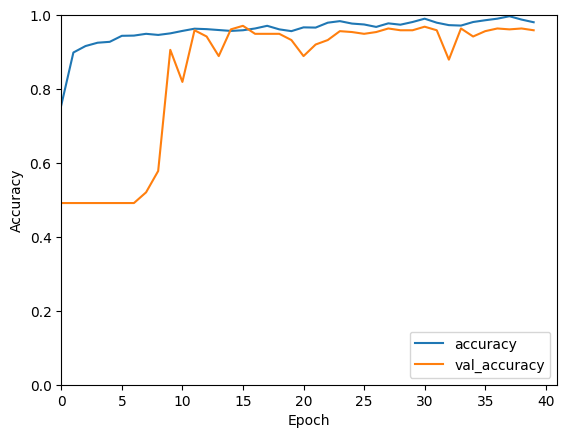

In [ ]:
plt.plot(historyCNN.history['accuracy'], label='accuracy')
plt.plot(historyCNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN = modelCNN.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 76ms/step - loss: 0.3133 - accuracy: 0.9567
Dokładność modelu 95.67%


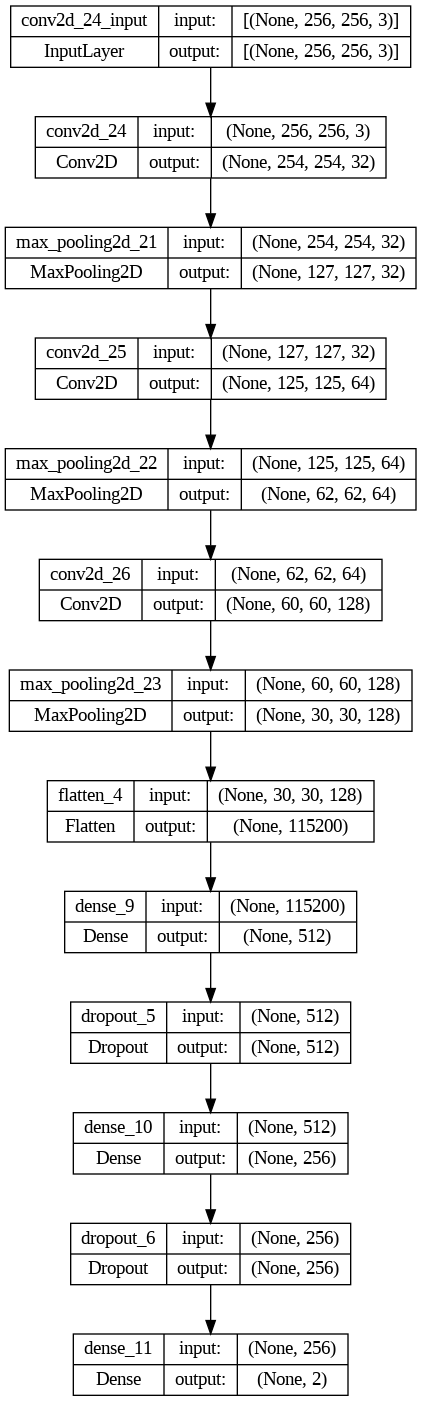

In [ ]:
modelCNN_2 = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation='softmax')

])
plot_model(modelCNN_2, show_shapes=True)

In [ ]:
# Kompilacja
modelCNN_2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN_2 = modelCNN_2.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
52/52 [==============================] - 14s 179ms/step - loss: 37.5620 - accuracy: 0.7989 - val_loss: 0.1734 - val_accuracy: 0.9470
Epoch 2/40
52/52 [==============================] - 5s 89ms/step - loss: 0.2576 - accuracy: 0.9097 - val_loss: 0.1687 - val_accuracy: 0.9349
Epoch 3/40
52/52 [==============================] - 5s 82ms/step - loss: 0.2303 - accuracy: 0.9133 - val_loss: 0.1627 - val_accuracy: 0.9325
Epoch 4/40
52/52 [==============================] - 5s 97ms/step - loss: 0.2293 - accuracy: 0.9157 - val_loss: 0.1674 - val_accuracy: 0.9277
Epoch 5/40
52/52 [==============================] - 6s 109ms/step - loss: 0.2164 - accuracy: 0.9133 - val_loss: 0.1640 - val_accuracy: 0.9373
Epoch 6/40
52/52 [==============================] - 5s 91ms/step - loss: 0.2103 - accuracy: 0.9175 - val_loss: 0.1622 - val_accuracy: 0.9398
Epoch 7/40
52/52 [==============================] - 5s 88ms/step - loss: 0.2025 - accuracy: 0.9199 - val_loss: 0.1515 - val_accuracy: 0.9446
Epoch 8/4

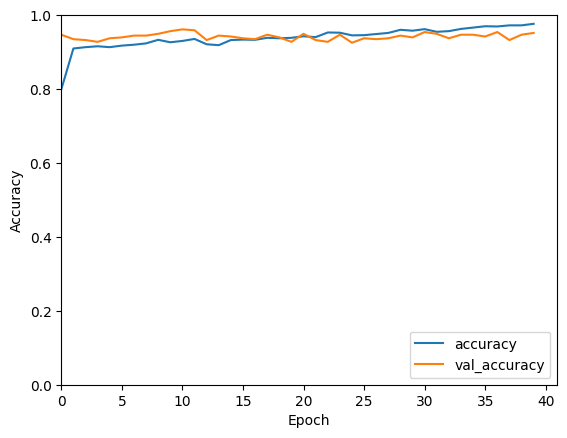

In [ ]:
plt.plot(historyCNN_2.history['accuracy'], label='accuracy')
plt.plot(historyCNN_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN_2 = modelCNN_2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN_2["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 60ms/step - loss: 0.4135 - accuracy: 0.9351
Dokładność modelu 93.51%


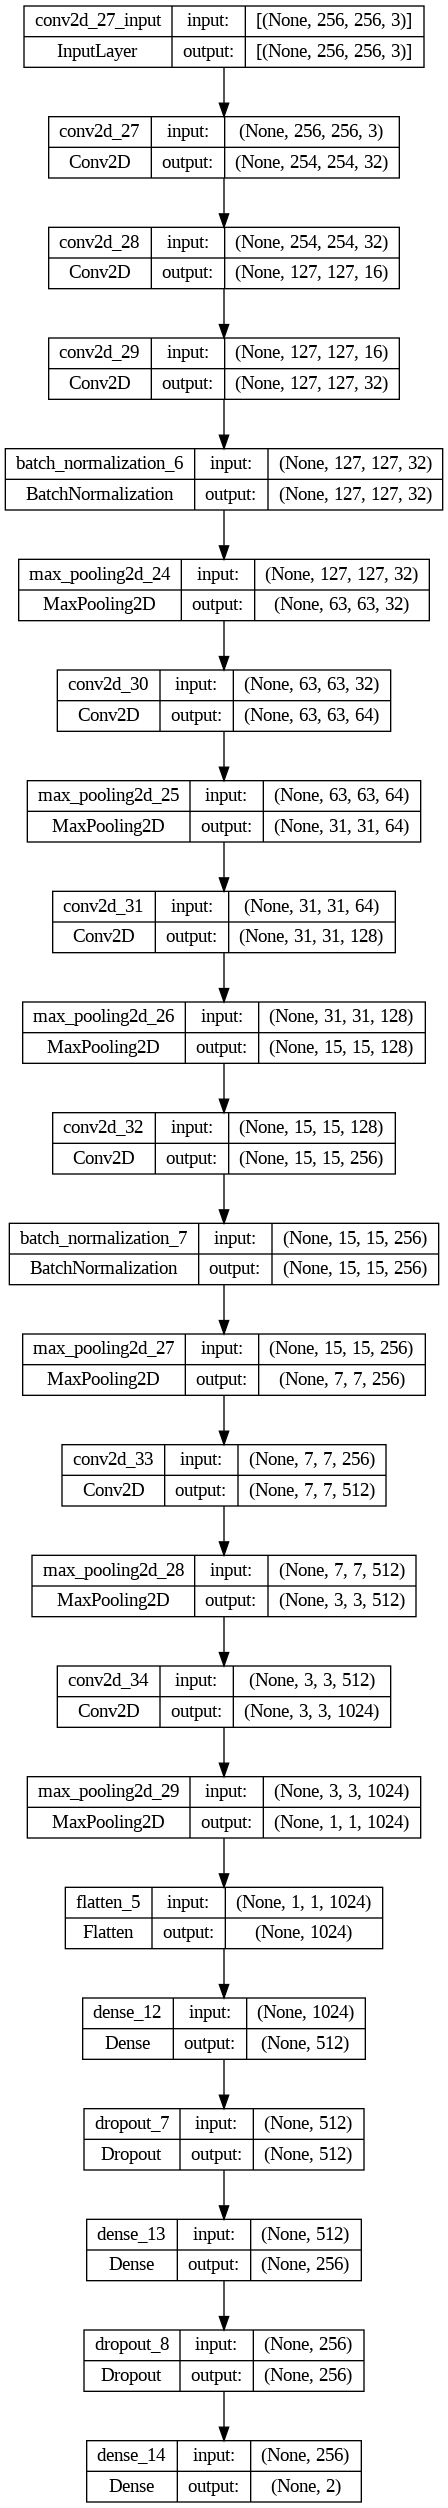

In [ ]:
modelCNN_3 = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation="softmax")
])
plot_model(modelCNN_3, show_shapes=True)

In [ ]:
# Kompilacja
modelCNN_3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN_3 = modelCNN_3.fit(train_dataset, epochs=50, validation_data=valid_dataset,
                    batch_size=64)

Epoch 1/50
52/52 [==============================] - 12s 125ms/step - loss: 0.7618 - accuracy: 0.7977 - val_loss: 0.7259 - val_accuracy: 0.5108
Epoch 2/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2580 - accuracy: 0.8946 - val_loss: 0.5897 - val_accuracy: 0.6048
Epoch 3/50
52/52 [==============================] - 4s 78ms/step - loss: 0.2299 - accuracy: 0.9055 - val_loss: 0.5188 - val_accuracy: 0.6241
Epoch 4/50
52/52 [==============================] - 4s 67ms/step - loss: 0.2347 - accuracy: 0.9187 - val_loss: 0.4893 - val_accuracy: 0.7036
Epoch 5/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2128 - accuracy: 0.9211 - val_loss: 0.3575 - val_accuracy: 0.9012
Epoch 6/50
52/52 [==============================] - 5s 87ms/step - loss: 0.2128 - accuracy: 0.9145 - val_loss: 0.2727 - val_accuracy: 0.9012
Epoch 7/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2142 - accuracy: 0.9278 - val_loss: 0.2762 - val_accuracy: 0.8795
Epoch 8/50


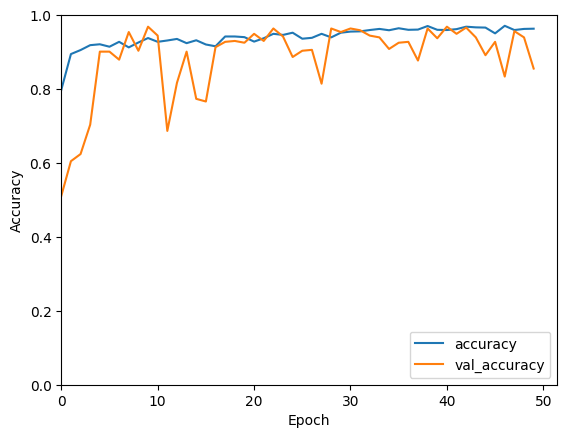

In [ ]:
plt.plot(historyCNN_3.history['accuracy'], label='accuracy')
plt.plot(historyCNN_3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN_3 = modelCNN_3.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN_3["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 83ms/step - loss: 0.4354 - accuracy: 0.8052
Dokładność modelu 80.52%


# **Uczenie Transferowe**

In [ ]:
# # Konfiguracja generatorów danych treningowych, walidacyjnych i testowych
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Ustawienie generatorów danych
# train_generator = train_datagen.flow_from_directory(
#     train_data_root,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='categorical'
# )

# val_generator = val_datagen.flow_from_directory(
#     valid_data_root,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_directory(
#     test_data_root,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='categorical'
# )

Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


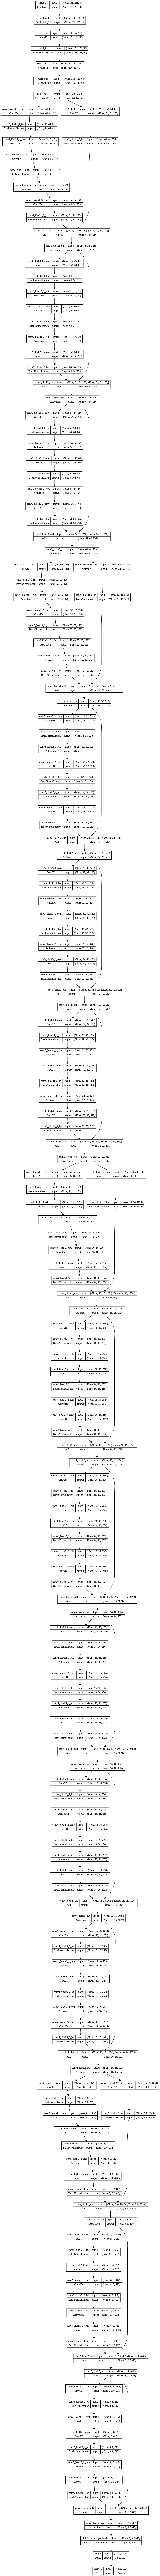

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Stworzenie końcowego modelu
modelTL = Model(inputs=base_model.input, outputs=predictions)
plot_model(modelTL, show_shapes=True)

In [9]:
# Kompilacja modelu
modelTL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening modelu
historyTL = modelTL.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 21s 249ms/step - loss: 0.4668 - accuracy: 0.8910 - val_loss: 0.0977 - val_accuracy: 0.9735
Epoch 2/40
52/52 [==============================] - 8s 145ms/step - loss: 0.1365 - accuracy: 0.9579 - val_loss: 0.0886 - val_accuracy: 0.9759
Epoch 3/40
52/52 [==============================] - 9s 165ms/step - loss: 0.1078 - accuracy: 0.9663 - val_loss: 0.0866 - val_accuracy: 0.9783
Epoch 4/40
52/52 [==============================] - 8s 145ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.1004 - val_accuracy: 0.9711
Epoch 5/40
52/52 [==============================] - 8s 148ms/step - loss: 0.0837 - accuracy: 0.9771 - val_loss: 0.0888 - val_accuracy: 0.9735
Epoch 6/40
52/52 [==============================] - 9s 167ms/step - loss: 0.0686 - accuracy: 0.9753 - val_loss: 0.0683 - val_accuracy: 0.9783
Epoch 7/40
52/52 [==============================] - 8s 144ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0905 - val_accuracy: 0.9711
Epoch

In [10]:
# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = modelTL.evaluate(test_dataset)

8/8 [==============================] - 2s 243ms/step - loss: 0.1644 - accuracy: 0.9654


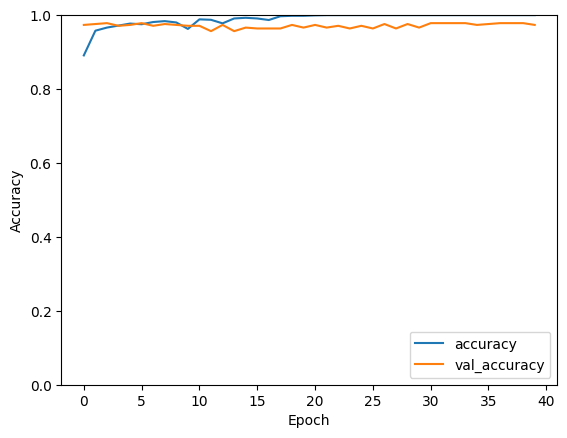

In [11]:
plt.plot(historyTL.history['accuracy'], label='accuracy')
plt.plot(historyTL.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [12]:
resultTL = modelTL.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 104ms/step - loss: 0.1644 - accuracy: 0.9654
Dokładność modelu 96.54%


Kompilacja przy użyciu metryki binary_crossentropy

In [10]:
# Kompilacja modelu
modelTL_2 = modelTL
modelTL_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[binary_accuracy])

# Trening modelu
historyTL_2 = modelTL_2.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 22s 275ms/step - loss: 0.3976 - binary_accuracy: 0.8760 - val_loss: 0.1112 - val_binary_accuracy: 0.9687
Epoch 2/40
52/52 [==============================] - 8s 150ms/step - loss: 0.1387 - binary_accuracy: 0.9554 - val_loss: 0.0997 - val_binary_accuracy: 0.9735
Epoch 3/40
52/52 [==============================] - 9s 158ms/step - loss: 0.1139 - binary_accuracy: 0.9645 - val_loss: 0.0855 - val_binary_accuracy: 0.9783
Epoch 4/40
52/52 [==============================] - 9s 158ms/step - loss: 0.0984 - binary_accuracy: 0.9693 - val_loss: 0.0888 - val_binary_accuracy: 0.9759
Epoch 5/40
52/52 [==============================] - 8s 156ms/step - loss: 0.0889 - binary_accuracy: 0.9741 - val_loss: 0.0832 - val_binary_accuracy: 0.9783
Epoch 6/40
52/52 [==============================] - 8s 158ms/step - loss: 0.0726 - binary_accuracy: 0.9747 - val_loss: 0.0645 - val_binary_accuracy: 0.9831
Epoch 7/40
52/52 [==============================] - 8s 156ms/st

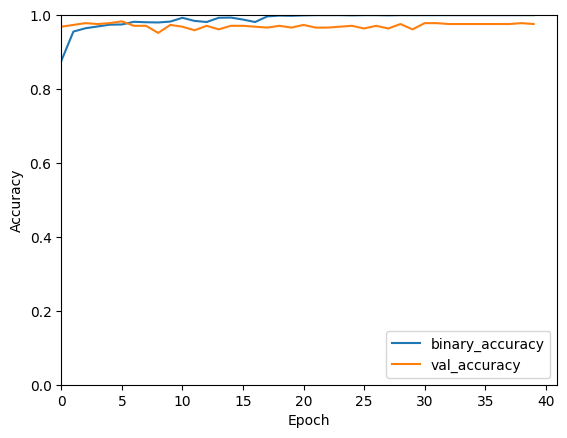

In [18]:
plt.plot(historyTL_2.history['binary_accuracy'], label='binary_accuracy')
plt.plot(historyTL_2.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [19]:
resultTL_2 = modelTL_2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL_2["binary_accuracy"]*100,2)}%')

8/8 [==============================] - 1s 111ms/step - loss: 0.1590 - binary_accuracy: 0.9697
Dokładność modelu 96.97%


# **Uczenie transferowe z odmrożeniem warstw**